In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [55]:
# Importing the dependencies
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [56]:
# loading the datasets to a pandas dataframe
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [57]:
# printing the first five rows of the dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
# printing the last five rows of the dataset
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [59]:
# checking the shape of the training data
train_data.shape

(891, 12)

In [60]:
# checking the training data for missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
# printing the first five rows of the test dataset
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
# printing the shape of the test dataset
test_data.shape

(418, 11)

In [63]:
# checking the testing dataset for missing values
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [64]:
# printing the first five rows of the gender_submission data
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Ages')

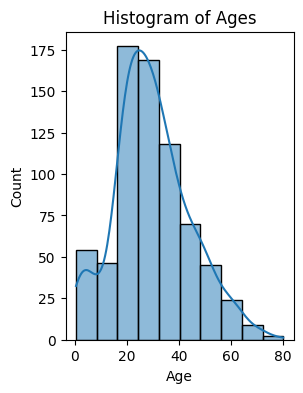

In [65]:
# plotting some features on a graph
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.histplot(train_data['Age'].dropna(), bins=10, kde=True)
plt.title('Histogram of Ages')

In [66]:
# filling the missing values
train_data.fillna({'Age':train_data['Age'].median()}, inplace=True)
train_data.fillna({'Cabin': ""}, inplace=True)
train_data.dropna(subset=['Embarked'], inplace=True)

In [67]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [68]:
print(train_data['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Ages')

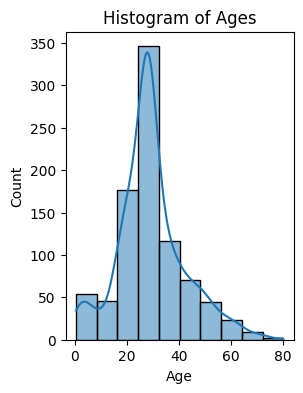

In [69]:
# plotting some features on a graph
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.histplot(train_data['Age'].dropna(), bins=10, kde=True)
plt.title('Histogram of Ages')

In [70]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S


In [71]:
unique_counts = train_data.nunique()
print(unique_counts)

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Cabin          147
Embarked         3
dtype: int64


In [72]:
train_data = train_data.drop(columns=['PassengerId', 'Name','Ticket','Embarked' ])

In [73]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,


In [74]:
# label encoding
label_encode1 = LabelEncoder()
train_data['Cabin'] = label_encode1.fit_transform(train_data['Cabin'])

label_encode2 = LabelEncoder()
train_data['Sex'] = label_encode2.fit_transform(train_data['Sex'])


In [75]:
train_data.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
886,0,2,1,27.0,0,0,13.00,0
887,1,1,0,19.0,0,0,30.00,30
888,0,3,0,28.0,1,2,23.45,0
889,1,1,1,26.0,0,0,30.00,60
890,0,3,1,32.0,0,0,7.75,0


In [76]:
X = train_data.drop('Survived', axis=1)
Y = train_data['Survived']

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=40)

**Data Standardization

In [78]:
# Standardizing the data
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [79]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [80]:
print(x_train_scaled)
print(x_test_scaled)

[[-0.39062694  0.72960783 -0.10932759 ... -0.45293941 -0.37703773
  -0.45424716]
 [-1.59817369 -1.37059933  1.53317685 ... -0.45293941 -0.10742538
   2.08414369]
 [-1.59817369  0.72960783 -0.96968705 ...  1.95934462  1.66412075
   1.62507301]
 ...
 [ 0.81691981  0.72960783 -2.14290451 ...  0.75320261 -0.20864992
  -0.45424716]
 [ 0.81691981  0.72960783 -1.04790155 ... -0.45293941 -0.48025998
  -0.45424716]
 [-0.39062694 -1.37059933  0.51638839 ... -0.45293941 -0.37703773
   1.97612706]]
[[-0.39062694  0.72960783  0.12531591 ...  0.75320261  0.12352137
  -0.45424716]
 [-0.39062694 -1.37059933  2.15889283 ... -0.45293941 -0.42917018
   3.21831833]
 [ 0.81691981  0.72960783 -0.03111309 ... -0.45293941 -0.48347551
  -0.45424716]
 ...
 [ 0.81691981 -1.37059933 -0.89147256 ... -0.45293941 -0.4918167
  -0.45424716]
 [-0.39062694  0.72960783 -0.81325806 ...  0.75320261  0.11822054
  -0.45424716]
 [-0.39062694 -1.37059933 -0.10932759 ... -0.45293941 -0.37703773
  -0.45424716]]


**Model Training**

**Cross Validation**

In [81]:
models  = {'LogisticRegression': LogisticRegression(),
          'SupportVectorMachine': SVC(),
          'RandomForest':RandomForestClassifier(),
          'GradientBoost': GradientBoostingClassifier()}

In [82]:
for name,model in models.items():
    cv_score = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f'model:{name}: mean_cv_accuracy={cv_score.mean()}')

In [83]:
model = LogisticRegression()

In [84]:
# Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear'],
    'degree': [2, 3, 4],
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)
print(f"Best parameters found: {grid_search.best_params_}")

In [85]:
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [86]:
y_train_pred = model.predict(x_train_scaled)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
print(y_train_accuracy * 100)

81.15330520393812


In [87]:
y_test_pred = model.predict(x_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy * 100)

79.21348314606742


In [88]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [89]:
test_data.shape

(418, 11)

In [90]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [91]:
# clean test data, preidict and submit!
# filling the missing values
test_data.fillna({'Age':test_data['Age'].median()}, inplace=True)
test_data.fillna({'Cabin': ""}, inplace=True)
test_data.dropna(subset=['Embarked'], inplace=True)
test_data.fillna({'Fare':test_data['Fare'].median()}, inplace=True)
test_data.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [92]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S


In [93]:
# drop the unused columns
test_data = test_data.drop(columns=['PassengerId', 'Name','Ticket','Embarked' ])
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,3,male,34.5,0,0,7.8292,
1,3,female,47.0,1,0,7.0000,
2,2,male,62.0,0,0,9.6875,
3,3,male,27.0,0,0,8.6625,
4,3,female,22.0,1,1,12.2875,


In [94]:
# label encoding
test_data['Cabin'] = label_encode1.fit_transform(test_data['Cabin'])
test_data['Sex'] = label_encode2.fit_transform(test_data['Sex'])
test_data.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [95]:
# Standardizing the data
test_data_scaled = scaler.transform(test_data)
print(test_data_scaled)


[[ 0.81691981  0.72960783  0.39906664 ... -0.45293941 -0.48486432
  -0.45424716]
 [ 0.81691981 -1.37059933  1.37674786 ... -0.45293941 -0.50215561
  -0.45424716]
 [-0.39062694  0.72960783  2.54996531 ... -0.45293941 -0.44611322
  -0.45424716]
 ...
 [ 0.81691981  0.72960783  0.71192463 ... -0.45293941 -0.49694236
  -0.45424716]
 [ 0.81691981  0.72960783 -0.18754208 ... -0.45293941 -0.48025998
  -0.45424716]
 [ 0.81691981  0.72960783 -0.18754208 ...  0.75320261 -0.18188929
  -0.45424716]]


In [96]:
print(test_data_scaled)

[[ 0.81691981  0.72960783  0.39906664 ... -0.45293941 -0.48486432
  -0.45424716]
 [ 0.81691981 -1.37059933  1.37674786 ... -0.45293941 -0.50215561
  -0.45424716]
 [-0.39062694  0.72960783  2.54996531 ... -0.45293941 -0.44611322
  -0.45424716]
 ...
 [ 0.81691981  0.72960783  0.71192463 ... -0.45293941 -0.49694236
  -0.45424716]
 [ 0.81691981  0.72960783 -0.18754208 ... -0.45293941 -0.48025998
  -0.45424716]
 [ 0.81691981  0.72960783 -0.18754208 ...  0.75320261 -0.18188929
  -0.45424716]]


In [97]:
test_data_prediction = model.predict(test_data_scaled)
print(test_data_prediction)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [98]:
len(test_data_prediction)

418

In [99]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [100]:
# creating predictions csv file
df = pd.DataFrame({'Survived':test_data_prediction})
df.index = range(892, 892 + len(test_data_prediction))
df.index.name = 'PassengerId'
df.to_csv('submissions.csv')

In [101]:
submissions_data = pd.read_csv('/kaggle/working/submissions.csv')

In [102]:
submissions_data.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [103]:
submissions_data.shape

(418, 2)